<a href="https://colab.research.google.com/github/ishreya09/CIFAR-100-Image-Classification/blob/main/Cifar_Image_Classification_CNN_%2B_KNN_and_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Link for collab -->
https://colab.research.google.com/drive/1fyhKLE9rd_F6pmX5K8Moh4__dp9wFFD-#scrollTo=eh8YntWPMudE


In [108]:
# imports


import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [93]:
# Use tensorflow for loading train and test

# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

# Print shapes of loaded data
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [94]:
# Convert labels to one-hot encoding
num_classes = 100
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes)

In [95]:
# Print example label before and after one-hot encoding
print(f"Example label before one-hot encoding: {train_labels[0]}")
print(f"Example label after one-hot encoding: {train_labels_one_hot[0]}")

Example label before one-hot encoding: [19]
Example label after one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [96]:
fine_label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'cra', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [97]:
# make mapping
MapToFine= {}

for i in range(len(fine_label)):
    MapToFine[i]= fine_label[i]

print(MapToFine)

{0: 'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle', 10: 'bowl', 11: 'boy', 12: 'bridge', 13: 'bus', 14: 'butterfly', 15: 'camel', 16: 'can', 17: 'castle', 18: 'caterpillar', 19: 'cattle', 20: 'chair', 21: 'chimpanzee', 22: 'clock', 23: 'cloud', 24: 'cockroach', 25: 'couch', 26: 'cra', 27: 'crocodile', 28: 'cup', 29: 'dinosaur', 30: 'dolphin', 31: 'elephant', 32: 'flatfish', 33: 'forest', 34: 'fox', 35: 'girl', 36: 'hamster', 37: 'house', 38: 'kangaroo', 39: 'keyboard', 40: 'lamp', 41: 'lawn_mower', 42: 'leopard', 43: 'lion', 44: 'lizard', 45: 'lobster', 46: 'man', 47: 'maple_tree', 48: 'motorcycle', 49: 'mountain', 50: 'mouse', 51: 'mushroom', 52: 'oak_tree', 53: 'orange', 54: 'orchid', 55: 'otter', 56: 'palm_tree', 57: 'pear', 58: 'pickup_truck', 59: 'pine_tree', 60: 'plain', 61: 'plate', 62: 'poppy', 63: 'porcupine', 64: 'possum', 65: 'rabbit', 66: 'raccoon', 67: 'ray', 68: 'road', 69: 'rocket', 70: 'rose', 7

In [99]:
from tensorflow.keras import layers,models

# Normalize
train_images = train_images/255.0
test_images = test_images/255.0

# model using CNN and KNN

In [134]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 classes in CIFAR-100
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 2, 2, 64)        

Epoch 1/5
1250/1250 [==============================] - 52s 40ms/step - loss: 4.0206 - accuracy: 0.0753 - val_loss: 3.6338 - val_accuracy: 0.1356
Epoch 2/5
1250/1250 [==============================] - 50s 40ms/step - loss: 3.3917 - accuracy: 0.1799 - val_loss: 3.2594 - val_accuracy: 0.2018
Epoch 3/5
1250/1250 [==============================] - 48s 38ms/step - loss: 3.0648 - accuracy: 0.2397 - val_loss: 2.9939 - val_accuracy: 0.2595
Epoch 4/5
1250/1250 [==============================] - 50s 40ms/step - loss: 2.8469 - accuracy: 0.2824 - val_loss: 2.9301 - val_accuracy: 0.2748
Epoch 5/5
1250/1250 [==============================] - 50s 40ms/step - loss: 2.6888 - accuracy: 0.3134 - val_loss: 2.8036 - val_accuracy: 0.2969
313/313 - 3s - loss: 2.7591 - accuracy: 0.3044 - 3s/epoch - 10ms/step
Test accuracy: 0.3043999969959259


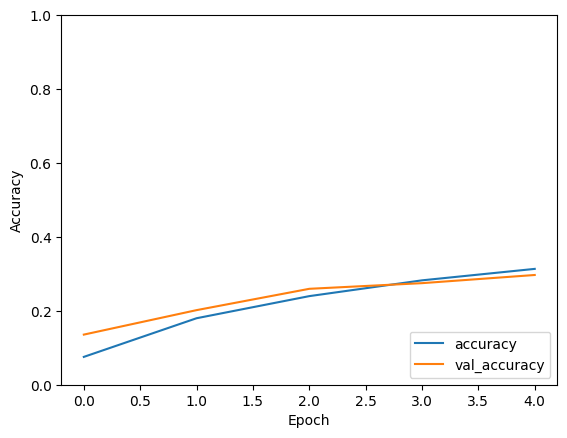

In [135]:
# Train the model
history = model.fit(train_images, train_labels, epochs=100,batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [136]:
# Extract features from the last dense layer
dense_features_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)
train_features = dense_features_model.predict(train_images)
test_features = dense_features_model.predict(test_images)

knn_classifier = KNeighborsClassifier(n_neighbors=100)

# Fit k-NN classifier on extracted features
knn_classifier.fit(train_features, train_labels)


313/313 [==============================] - 3s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [137]:
# Predict using k-NN
test_predictions = knn_classifier.predict(test_features)

# Evaluate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy using k-NN: {accuracy:.4f}")

Accuracy using k-NN: 0.3023


In [ ]:
# make elbow plot for knn

In [ ]:
model.save("CnnKnnModel.h5")

# Using Resnet50

ResNet stands for Residual Network.
50 in the name refers to the number of layers in the network (specifically, 48 convolutional layers, one MaxPool layer, and one average pool layer).


#### Key Characteristics of ResNet-50:
1. Shortcut Connections (Skip Connections):
        ResNet introduces shortcut connections that “skip over” some layers.
        These connections allow gradients to flow directly through the network, addressing the vanishing gradient problem.
        Shortcut connections convert a regular network into a residual network.
2. Bottleneck Design:
        ResNet-50 uses a bottleneck design for its building blocks.
        A bottleneck residual block includes 1x1 convolutions (known as a “bottleneck”) to reduce the number of parameters and matrix multiplications.
        This design enables faster training of each layer.
3. Stacked Layers:
        ResNet-50 stacks multiple layers to form the final neural network.
        It includes a stack of three layers instead of two, which further enhances its expressiveness.


## ResNet-50 Architecture:
The architecture includes:
        A 7x7 kernel convolution with 64 filters and a 2-sized stride.
        A max pooling layer with a 2-sized stride.
        Multiple layers with different kernel sizes and filter counts (1x1, 3x3, and 1x1).
        Bottleneck blocks with 1x1, 3x3, and 1x1 convolutions.
        Iterations of these layers to form the complete ResNet-50.


In [138]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# Load the pre-trained ResNet-50 model from TensorFlow Hub
resnet50_model = hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4", trainable=False)


In [122]:

input_image = np.random.rand(1, 32, 32, 3)
embeddings = resnet50_model(input_image)
print(embeddings.shape)

(1, 2048)


In [139]:
# Compile the model
model = tf.keras.Sequential([
    resnet50_model,
    layers.Dense(64,activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 classes in your custom dataset
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(1, 32, 32, 3))
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (1, 2048)                 23564800  
                                                                 
 dense_60 (Dense)            (1, 64)                   131136    
                                                                 
 dense_61 (Dense)            (1, 100)                  6500      
                                                                 
Total params: 23702436 (90.42 MB)
Trainable params: 137636 (537.64 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


Epoch 1/10
1250/1250 [==============================] - 180s 140ms/step - loss: 3.8213 - accuracy: 0.1522 - val_loss: 3.4904 - val_accuracy: 0.1938
Epoch 2/10
1250/1250 [==============================] - 173s 138ms/step - loss: 3.2136 - accuracy: 0.2423 - val_loss: 3.3796 - val_accuracy: 0.2125
Epoch 3/10
1250/1250 [==============================] - 174s 139ms/step - loss: 2.9687 - accuracy: 0.2828 - val_loss: 3.3535 - val_accuracy: 0.2176
Epoch 4/10
1250/1250 [==============================] - 180s 144ms/step - loss: 2.8039 - accuracy: 0.3165 - val_loss: 3.3986 - val_accuracy: 0.2206
Epoch 5/10
1250/1250 [==============================] - 173s 139ms/step - loss: 2.6718 - accuracy: 0.3416 - val_loss: 3.4474 - val_accuracy: 0.2177
Epoch 6/10
1250/1250 [==============================] - 173s 138ms/step - loss: 2.5633 - accuracy: 0.3661 - val_loss: 3.5115 - val_accuracy: 0.2178
Epoch 7/10
1250/1250 [==============================] - 173s 138ms/step - loss: 2.4696 - accuracy: 0.3842 - val_

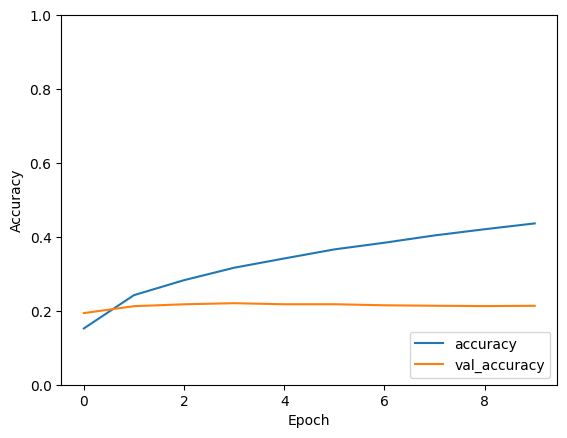

In [140]:

# Train the model
history= model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()